# Simulación numérica | Máquina de Atwood compuesta

[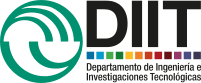](https://ingenieria.unlam.edu.ar/)    
[cc-by-sa](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Enunciado
![Máquino de Atwood compuesta por dos poleas](figuras/marion_fig7_6.png)

- Coordenadas generalizadas: Describen todas posiciones verticales $y_1 y_2, y_3$ e $y_p$.
    Utilizaré una nomenclatura un tanto más específica que las coordenadas indicadas como $x,y$.
    - Desde la posición vertical del centro de la polea superior
        - $y_1 = x$,
        - $y_p = l_1 - x$,
    - Desde la posición vertical del centro de la polea inferior $y_p$
        - $y_2 = y$,
        - $y_3 = l_2 - y$,        
- Ligaduras: $$y_1 + y_p + \pi R = l_1,$$ e $$ y_2 + y_3 + \pi R = l_2,$$ siendo $R$ el radio de las poleas.

## Lagrangiano

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Defino parámetros
R, m1, m2, m3, mp, g, l1, l2 = sym.symbols('R, m_1, m_2, m_3, m_p, g, l_1, l_2', positive=True)
# Defino coordenadas generalizadas 
t = sym.symbols('t') # tiempo
y1 = sym.Function('y_1')(t)
y2 = sym.Function('y_2')(t)
y3 = sym.Function('y_3')(t)
yp = sym.Function('y_p')(t)
r1, r2, r3, rp, lambda1, lambda2 = sym.symbols('r_1, r_2, r_3, r_p, lambda_1, lambda_2')

f1 = y1+ yp + sym.pi* R - l1 # vínculo l1 como función homogénea
f2 = y2+ y3 + sym.pi* R - l2 # vínculo l2 como función homogénea
r1 = y1
r2 = yp + y2
r3 = yp + y3
rp = yp                      

### Energía cinética

La energía cinética por la rotación de las poleas las escribiremos en función de las otras coordenadas y no en función de su ángulo de rotación gracias.

La velocidad angular de rotación es $\dot{\theta} = \omega = \frac{v}{R}$, siendo $v$ la velocidad tangencial que coincide con la de las masas que cuelgan.

El momento de inercia de las poleas para la rotación en torno a su eje de simetría es la de un cilindro que $I_\text{cilíndro} = \frac{M}{2} R^2$.

Así este término para la polea superior sería $\frac{I}{2} \dot{\theta}^2 = \frac{1}{2} \frac{M}{2} R^2 \left( \frac{\dot{y}_1}{R} \right)^2 = \frac{M}{4} \dot{y}_1^2$ donde uso la coordenada de la masa izquierda $y_1$ que cuando $\dot{y}_1>0$ también $\dot{\theta}>0$.

In [3]:
# Energía cinética
unMedio = sym.Rational(1,2) # Rational: fracción de enteros
T = sym.Eq(sym.Symbol('T'), 
           unMedio *(
               m1* r1.diff(t)**2 \
               + mp/2* r1.diff(t)**2 \
               + m2* r2.diff(t)**2 \
               + mp/2* r2.diff(t)**2 \
               + m3* r3.diff(t)**2 \
               + mp* rp.diff(t)**2 \
           )
          ).simplify() # simplify: simplifica usando factor común y otras operaciones
T

### Energía potencial

In [4]:
# Energía potencial
V = sym.Eq(sym.Symbol('V'),
           g*( \
              m1* (-r1) \
              + m2* (-r2) \
              + m3* (-r3) \
              + mp* (-rp) \
             )
          ).simplify()
V

### Lagrangiano

In [5]:
L = sym.Eq(sym.Symbol('\mathcal{L}'), T.rhs - V.rhs ).simplify()
L

### Ecuaciones de Euler-Lagrange

Primero calculamos el que tiene derivada total respecto al tiempo
$$\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q_i}} L$$

In [8]:
y1_dt = L.rhs.diff(y1.diff(t)).diff(t) # primero deriva con x punto y luego con
y2_dt = L.rhs.diff(y2.diff(t)).diff(t) # primero deriva con x punto y luego con
y3_dt = L.rhs.diff(y3.diff(t)).diff(t) # primero deriva con x punto y luego con
yp_dt = L.rhs.diff(yp.diff(t)).diff(t) # primero deriva con x punto y luego con
y1_dt, y2_dt.simplify()

Luego el que deriva respecto a la coordenada generalizada
$$
\frac{\partial}{\partial q_i} L
$$

In [9]:
y1_dq = L.rhs.diff(y1)
y2_dq = L.rhs.diff(y2)
y3_dq = L.rhs.diff(y3)
yp_dq = L.rhs.diff(yp)
y1_dq

Y también hay que obtener los
$$
\sum_j \lambda_j \frac{\partial f_j}{\partial q_i}
$$

In [10]:
y1_lam = lambda1* f1.diff(y1) + lambda2* f2.diff(y1)
y2_lam = lambda1* f1.diff(y2) + lambda2* f2.diff(y2)
y3_lam = lambda1* f1.diff(y3) + lambda2* f2.diff(y3)
yp_lam = lambda1* f1.diff(yp) + lambda2* f2.diff(yp)
y1_lam

Con ambos se escribe la ecuación homegénea (no hay fuerzas no conservativas)
$$
\frac{\partial}{\partial q_i} L
- \frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q}_i} L
+ \sum_j \lambda_j \frac{\partial f_j}{\partial q_i}
= 0
$$

In [11]:
y1_el = sym.Eq(y1_dq - y1_dt + y1_lam, 0) # ecuación igualando a cero
y2_el = sym.Eq(y2_dq - y2_dt + y2_lam, 0) # ecuación igualando a cero
y3_el = sym.Eq(y3_dq - y3_dt + y3_lam, 0) # ecuación igualando a cero
yp_el = sym.Eq(yp_dq - yp_dt + yp_lam, 0) # ecuación igualando a cero
y1_el.simplify(), y2_el.simplify(), y3_el.simplify(), yp_el.simplify() 

Las ecuaciones de vínculo se pueden diferenciar para obtener dos relaciones adicionales con $\ddot{y}_i$

In [12]:
f1_el = sym.Eq(f1.diff(t,2) ) # si no se escribe el cero, se asume
f2_el = sym.Eq(f2.diff(t,2) )
f1_el, f2_el

Con estas últimas tenemos un sistema de seis ecuaciones diferenciales lineales de segundo orden homogéneas.

In [13]:
ypp = [y1.diff(t,2), y2.diff(t,2), y3.diff(t,2), yp.diff(t,2)] # vector (lista) y punto punto 
eqns = [y1_el.args[0].expand(),
        y2_el.args[0].expand(),
        y3_el.args[0].expand(),
        yp_el.args[0].expand(),
        f1_el.args[0],
        f2_el.args[0]
       ] # expand ayuda a que el comando siguiente "no se pierda"
A,b = sym.linear_eq_to_matrix(eqns, ypp )

ValueError: 
Expecting a Symbol but got Derivative(y_1(t), (t, 2))

In [ ]:
sym.Eq(sym.MatMul(A, sym.Matrix(ypp)), b)

Aprovechando las relaciones que provienen de $f_1$ y $f_2$ se puede todo a una dependencia de solo dos coordenadas generalizadas: $y_1$ y $y_2$.

In [ ]:
eqns_sub = [x.subs([(y3.diff(t,2), -y2.diff(t,2) ), (yp.diff(t,2), -y1.diff(t,2) )]) for x in eqns]
A_sub, b_sub = sym.linear_eq_to_matrix(eqns_sub[:-2], ypp[:-2] ) # [:-2] quita los dos últimos
sym.Eq(sym.MatMul(A_sub, sym.Matrix(ypp[:-2] ) ), b_sub)

Si buscamos expresiones de donde despejar los $\lambda_i$, para obtener las fuerzas de vínculo, podemos sumar las mitades del primero y último, y por otro lado del 2.o y 3.o. 

In [ ]:
A_lambda = sym.Matrix( [
    unMedio* ( A_sub[0,:] + A_sub[3,:] ),
    unMedio* ( A_sub[1,:] + A_sub[2,:] )
] )

b_lambda = sym.Matrix( [
    unMedio* ( b_sub[0] + b_sub[3] ),
    unMedio* ( b_sub[1] + b_sub[2] )
] )

sym.Eq(sym.MatMul(A_lambda, sym.Matrix(ypp[:-2] ) ), b_lambda)

Para obtener la dinámica se puede hacer algo similar, pero restando para eliminar las $\lambda_i$.

In [ ]:
A_din = sym.Matrix( [
    unMedio* ( A_sub[0,:] - A_sub[3,:] ),
    unMedio* ( A_sub[1,:] - A_sub[2,:] )
] )

b_din = sym.Matrix( [
    unMedio* ( b_sub[0] - b_sub[3] ),
    unMedio* ( b_sub[1] - b_sub[2] )
] )

sym.Eq(sym.MatMul(A_din, sym.Matrix(ypp[:-2] ) ), b_din)

In [ ]:
ypp_solve = A_din.solve(b_din)
ypp_solve = [x.simplify() for x in ypp_solve]
sym.Eq(sym.Matrix(ypp[:-2] ) , sym.Matrix(ypp_solve ))

## Resolución numérica

In [ ]:
# escribo los valores numéricos en variables
m1_val = 1 # [kg]
m2_val = 2 # [kg]
m3_val = 3 # [kg]
mp_val = 4 # [kg]
g_val = 9.81 # [m s-2]

# un diccionario (un tipo de variable Python) fácilará el reemplazar con valores numéricos
magnitudes = {
    m1 : m1_val,
    m2 : m2_val,
    m3 : m3_val,
    mp : mp_val,
    g : g_val
}

In [ ]:
aceleraciones_numpy = [( sym.lambdify(t, x.subs(magnitudes) ) )(0) for x in ypp_solve]

Para esta ecuación diferencial de 2.o orden la integración numérica nos entregará un vector con la   coordenada y velocidades generalizadas.
Haremos dos vectores, uno pa $y_1$ y otro para $y_2$
$$
\left\{
\begin{array}{l}
vect1_0 = y_1 \\
vect1_1 = \dot{vect1}_0 = \dot{y}_1 \\
\end{array}
\right.
$$
y
$$
\left\{
\begin{array}{l}
vect2_0 = y_2 \\
vect2_1 = \dot{vect2}_2 = \dot{y}_2 \\
\end{array}
\right.
$$

Para obtenerlos lo alimentaremos con el que correspende a la derivada del mismo con velocidades y aceleraciones. Solo las últimas son dato:
$$
\left\{
\begin{array}{l}
\dot{vect1}_0 = vect1_1 \\
\dot{v1}_1 = \ddot{y}_1 \\
\end{array}
\right.
$$
y
$$
\left\{
\begin{array}{l}
\dot{vect2}_0 = vect2_1 \\
\dot{vect2}_1 = \ddot{y}_2 \\
\end{array}
\right.
$$

In [ ]:
# defino una función con el sistema de derivadas
# t : no se usa en este sistema pero lo dejamos para uso posterior
# vect_i : lista de estado con [x_0, x_1]
# c : lista de constates, en este caso las aceleraciones
# dx_dt : lista de derivadas
def derivaday1(t, vect_1):
    dy1dt = [vect_1[1], aceleraciones_numpy[0]]
    return dy1dt

def derivaday2(t, vect_2):
    dy2dt = [vect_2[1], aceleraciones_numpy[1]]
    return dy2dt

Ahora defino condiciones iniciales del sistema y el rango de tiempo a analizar 

In [ ]:
# biblioteca de cálculo numérico general
import numpy as np

In [ ]:
# parámetros para inicial las integración de sistemaDerivadas
t_rango = np.linspace(0,2, num= 100) # 100 tiempos entre 0 y 10 s
y1_inicial = [1,0] # parte del reposo y_1 = 1m
y2_inicial = [2,0] # parte del reposo y_2 = 2m

In [ ]:
# biblioteca de cálculo científico: eficientes herramientas de cálculo numérico
from scipy.integrate import solve_ivp

In [ ]:
# E integrar de a pasos en el tiempo
sol_y1 = solve_ivp(derivaday1, (t_rango[0], t_rango[-1] ), y1_inicial, t_eval = t_rango)
sol_y2 = solve_ivp(derivaday2, (t_rango[0], t_rango[-1] ), y2_inicial, t_eval = t_rango)

## Graficación

In [ ]:
# biblioteca de graficación
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
def graficaFuncion(solucion, nombreCoordenada='q'):
    fig, ax = plt.subplots(nrows= 1, ncols= 2, squeeze=False, figsize=(12, 4)) # dos figuras en la misma fila
    fig.suptitle('Integración numérica para '+ nombreCoordenada, fontsize=16)
    ax[0,0].plot(solucion.t, solucion.y[0]) # posición
    ax[0,0].set(xlabel='t [s]', ylabel= '$' + nombreCoordenada+ '$ [m]', title='Posición')
    ax[0,1].plot(solucion.t, solucion.y[1]) # velocidad
    ax[0,1].set(xlabel='t [s]', ylabel='$\dot{' + nombreCoordenada+ '}$ [m/s]', title='Velocidad')

In [ ]:
graficaFuncion(sol_y1, nombreCoordenada = 'y_1')

In [ ]:
graficaFuncion(sol_y2, nombreCoordenada = 'y_2')